In [47]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    RocCurveDisplay,
)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Run 1 - Model with momentum and radius

- Momentum and radius
- delta: 0.2
- Epochs: 16
- Train: B and C
- Test: A (Balanced)

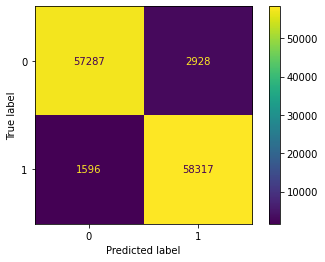

In [48]:
run1_bal_df = pd.read_csv("saved_models/predictions_new_0306.csv")
cm = confusion_matrix(run1_bal_df["labels"], run1_bal_df["predictions"])
norm_cm = cm.astype("float") * 100.0 / cm.sum(axis=1)[:, np.newaxis]

ConfusionMatrixDisplay(cm).plot()


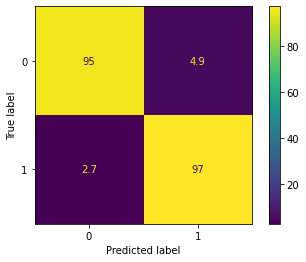

In [49]:
ConfusionMatrixDisplay(norm_cm).plot()

- Test: A (Not balanced)

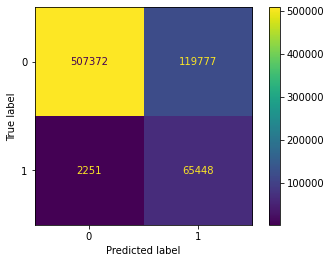

In [50]:
run1_df = pd.read_csv("saved_models/pointnet_momentum_radius_0306_full_test.csv")
cm = confusion_matrix(run1_df["labels"], run1_df["predictions"])
norm_cm = cm.astype("float") * 100.0 / cm.sum(axis=1)[:, np.newaxis]

ConfusionMatrixDisplay(cm).plot()


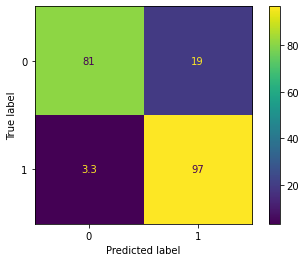

In [51]:
ConfusionMatrixDisplay(norm_cm).plot()

## Run 2 - Model with momentum (16 epochs)

- Momentum: True
- Radius: False
- delta: 0.2
- Epochs: 16
- Train: B and C
- Test: A (Unbalanced)

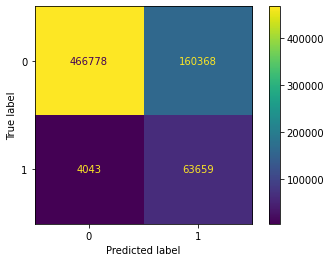

In [52]:
run2_df = pd.read_csv("saved_models/pointnet_momentum_only_0506_16epochs.csv")
cm = confusion_matrix(run2_df["labels"], run2_df["predictions"])
norm_cm = cm.astype("float") * 100.0 / cm.sum(axis=1)[:, np.newaxis]

ConfusionMatrixDisplay(cm).plot()


In [53]:
ConfusionMatrixDisplay(norm_cm).plot()

## Run 3 - Model with momentum (24 epochs)

- Momentum: True
- Radius: False
- delta: 0.2
- Epochs: 24
- Train: B and C
- Test: A (Unbalanced)

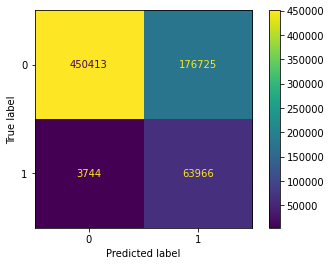

In [ ]:
run3_df = pd.read_csv("saved_models/pointnet_momentum_only_0506_24epochs.csv")
cm = confusion_matrix(run3_df["labels"], run3_df["predictions"])
norm_cm = cm.astype("float") * 100.0 / cm.sum(axis=1)[:, np.newaxis]

ConfusionMatrixDisplay(cm).plot()


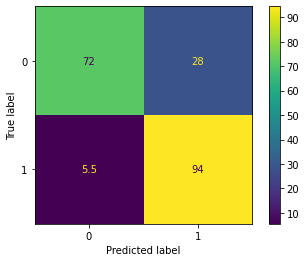

In [ ]:
ConfusionMatrixDisplay(norm_cm).plot()

## Roc Curve

In [ ]:
models = {
    "momentum: yes, radius: yes, delta: 0.2, epochs: 16": run1_df,
    "momentum: yes, radius: no, delta: 0.2, epochs: 16": run2_df,
    "momentum: yes, radius: no, delta: 0.2, epochs: 24": run3_df,
}


def plot_roc_curves(models):

    fig, ax = plt.subplots(figsize=(10, 10))

    for name, df in models.items():

        fpr, tpr, _ = roc_curve(
            y_true=df["labels"],
            y_score=df["probabilities"],
        )

        disp = RocCurveDisplay(fpr=fpr, tpr=tpr, estimator_name=name)

        disp.plot(ax=ax)

    ax.set_title("Pointnet Test Set A (Unbalanced")
    plt.show()


plot_roc_curves(models)


NameError: name 'plt' is not defined